# Linear Regression math and Least Squares Method Practice

## Generate linear regression data & Calculate coefs

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from mlpeople.models.linear import (
    generate_linear_regression_data,
    fit_ols,
    plot_features_vs_target
)

True beta: [ 1.   2.  -1.5  0.5]
Estimated beta: [ 1.05643115  1.96116836 -1.52498178  0.44620334]


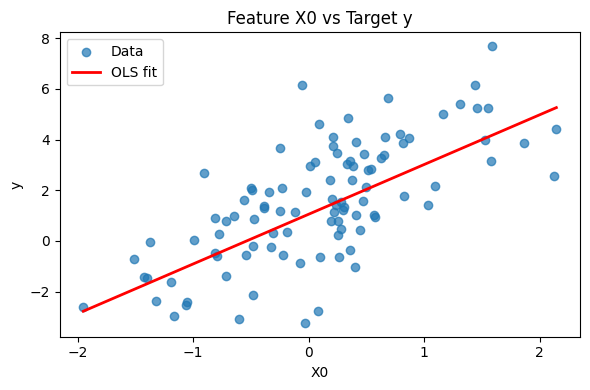

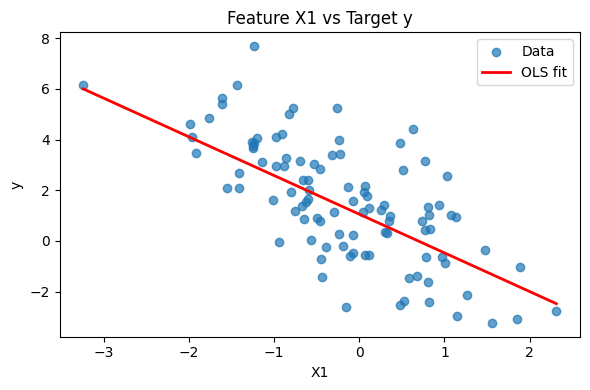

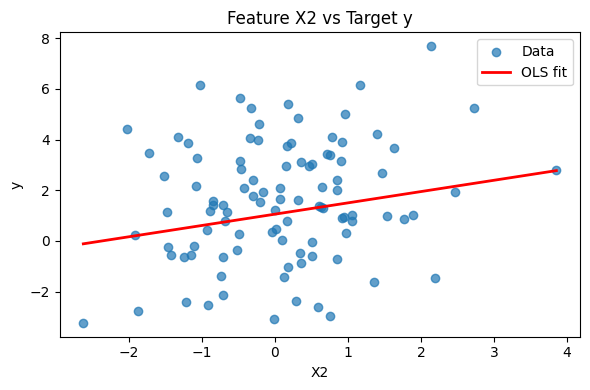

In [7]:
# Generate data
X, y, beta_true = generate_linear_regression_data(
    n=100, p=3, coefs=[2.0, -1.5, 0.5], intercept=1.0, sigma=0.5, seed=42
)

# Fit OLS
beta_hat = fit_ols(X, y, fit_intercept=True)

print("True beta:", beta_true)
print("Estimated beta:", beta_hat)

# Plot features vs target with fitted lines
plot_features_vs_target(X, y, beta_hat=beta_hat)



## Use sklearn to generate linear regression data

In [8]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

from mlpeople.models.linear import generate_regression_data_sklearn

True beta: [ 1.   2.  -1.5  0.5]
Estimated beta: [ 0.95181983  1.98583266 -1.54713966  0.47471898]


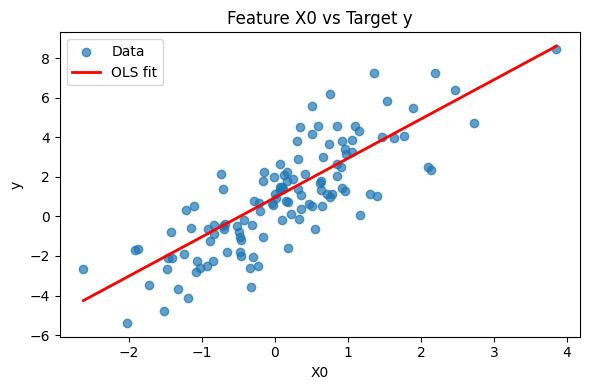

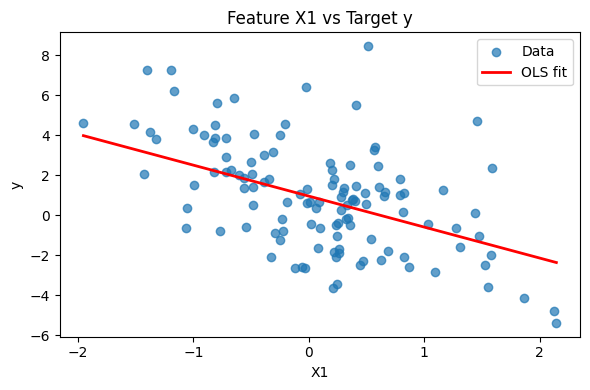

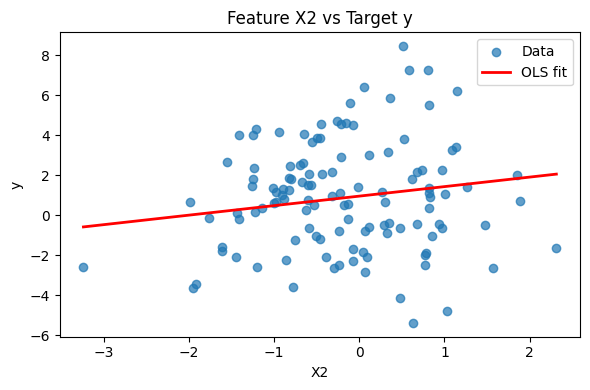

In [9]:
# Generate data using sklearn
X, y, beta_true = generate_regression_data_sklearn(
    n_samples=120,
    n_features=3,
    noise=0.8,
    coef=[2.0, -1.5, 0.5],
    bias=1.0,
    random_state=42
)

# Fit OLS
beta_hat = fit_ols(X, y, fit_intercept=True)

# Print results
print("True beta:", beta_true)
print("Estimated beta:", beta_hat)

# Plot features vs target
plot_features_vs_target(X, y, beta_hat)


## Predict and calculate metrics

In [10]:
import numpy as np

from mlpeople.models.linear import (
    predict,
    r2_score,
    rmse,
    mae,
    rmsle
)

In [11]:
# Generate data
X, y, beta_true = generate_linear_regression_data(
    n=100, p=3, coefs=[2.0, -1.5, 0.5], intercept=5.0, sigma=0.5, seed=42
)

# Fit OLS
beta_hat = fit_ols(X, y, fit_intercept=True)

y_pred = predict(X, beta_hat, fit_intercept=True)

print("R²:", r2_score(y, y_pred))
print("RMSE:", rmse(y, y_pred))
print("MAE:", mae(y, y_pred))
print("RMSLE:", rmsle(y, y_pred))


R²: 0.965305621509053
RMSE: 0.43496071290888483
MAE: 0.3486005494404148
RMSLE: 0.08005863447568108


In [12]:
np.mean(y), np.std(y), np.min(y), np.max(y)

(np.float64(5.549212813396337),
 np.float64(2.3351806096682),
 np.float64(0.7685011952643648),
 np.float64(11.684993628219754))

### One Feature prediction, metrics, visualizations

In [13]:
from mlpeople.models.linear import plot_ols_predictions_with_error

True beta: [5.  1.5]
Estimated beta: [4.26107065 1.3845495 ]


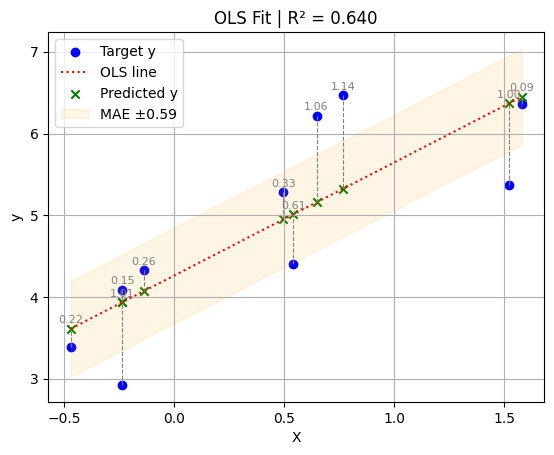

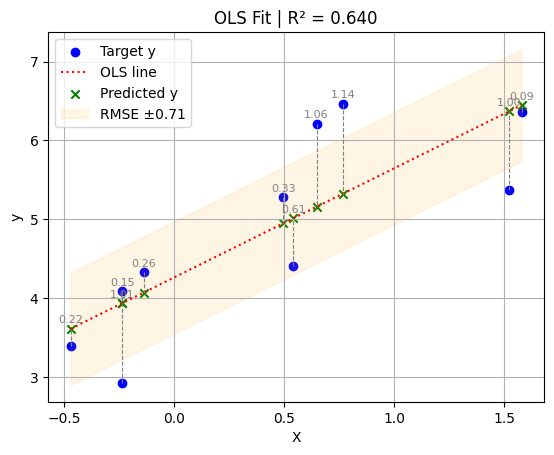

In [14]:
X, y, beta_true = generate_linear_regression_data(
    n=10, p=1, coefs=[1.5], intercept=5.0, sigma=1, seed=42
)

# Fit OLS
beta_hat = fit_ols(X, y, fit_intercept=True)

# Print results
print("True beta:", beta_true)
print("Estimated beta:", beta_hat)

# Plot
# Example 1: MAE band
plot_ols_predictions_with_error(X, y, beta_hat, with_error="MAE", show_error_lines=True)

# Example 2: RMSE band
plot_ols_predictions_with_error(X, y, beta_hat, with_error="RMSE", show_error_lines=True)


### MAE vs RMSE vs RMSLE

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from mlpeople.models.linear import plot_mae_rmse_rmsle

#### Example where RMSLE makes sense

Targets span multiple orders of magnitude (e.g. prices, revenue).

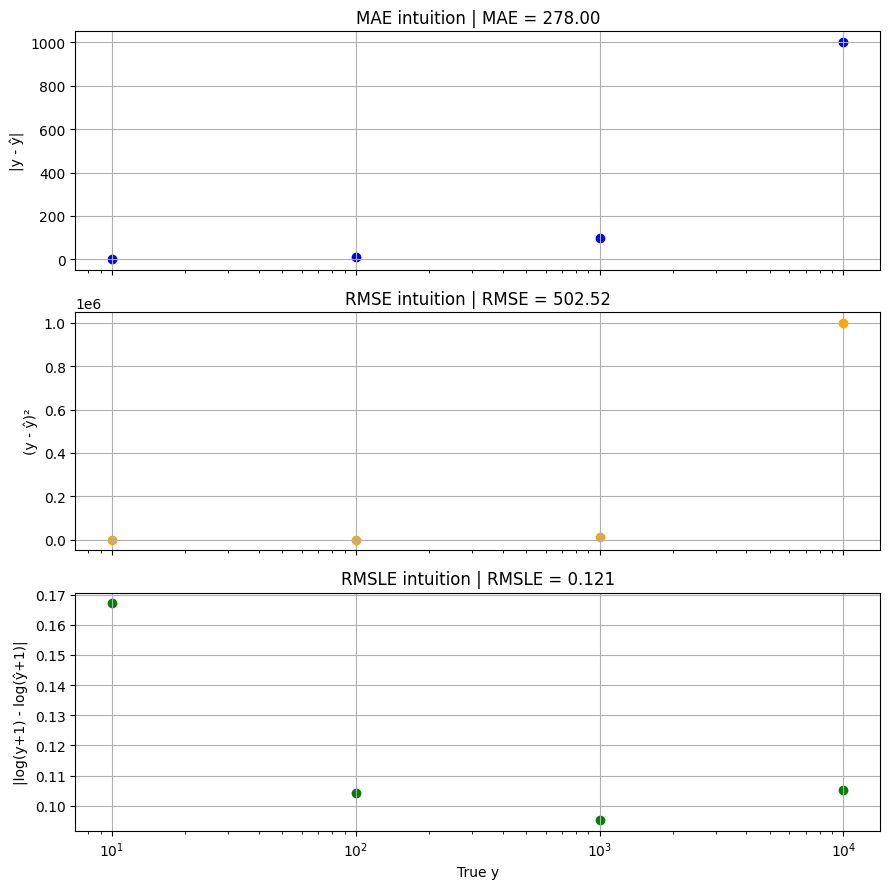

In [16]:
## Dataset where RMSLE makes sense ##
y_true = np.array([10, 100, 1_000, 10_000])
y_pred = np.array([12, 90, 1_100, 9_000])

plot_mae_rmse_rmsle(y_true, y_pred)



#### Example where RMSLE is ❌ not appropriate
Targets are small and bounded (e.g. temperature).

MAE: 0.9
RMSE: 0.9746794344808963
RMSLE: 0.04471863196722005


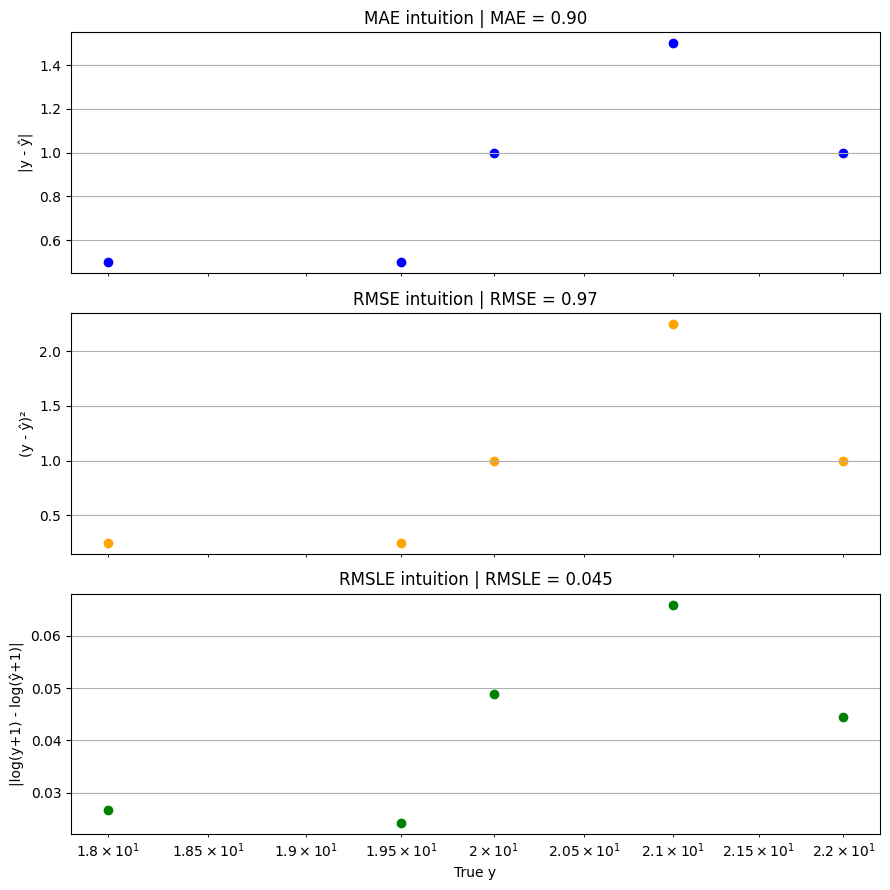

In [17]:
## Dataset where RMSLE not really relavant ##
y_true = np.array([18.0, 19.5, 20.0, 21.0, 22.0])
y_pred = np.array([17.5, 20.0, 19.0, 22.5, 21.0])

print("MAE:", mae(y_true, y_pred))
print("RMSE:", rmse(y_true, y_pred))
print("RMSLE:", rmsle(y_true, y_pred))

plot_mae_rmse_rmsle(y_true, y_pred)


#### Summary: MAE vs RMSE vs RMSLE

| Metric | Error intuition | Penalizes more | Best used when |
|------|-----------------|---------------|---------------|
| **MAE** | \|y − ŷ\| | All errors equally | Errors are interpretable in original units |
| **RMSE** | (y − ŷ)² | Large errors disproportionately | Large mistakes are especially undesirable |
| **RMSLE** | \|log(y + 1) − log(ŷ + 1)\| | Relative (percentage-like) errors | Targets span orders of magnitude and y > 0 |


- Use **MAE** when:
  - You care about average error in original units
  - All errors should be treated equally
  - Interpretability is important

- Use **RMSE** when:
  - Large errors must be penalized more
  - Outliers are costly
  - You want smoother optimization behavior

- Use **RMSLE** when:
  - Targets are strictly positive
  - Relative error matters more than absolute error
  - Values span several orders of magnitude (e.g. prices, revenue)

> **If the unit already has physical meaning (°C, kg, seconds), do NOT use RMSLE.**


## Residual Plots

In [37]:
from mlpeople.models.linear import plot_residuals

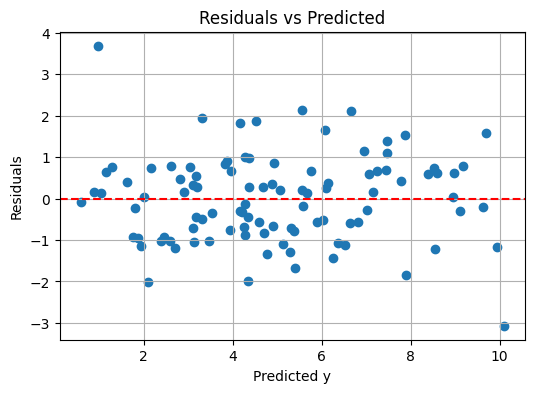

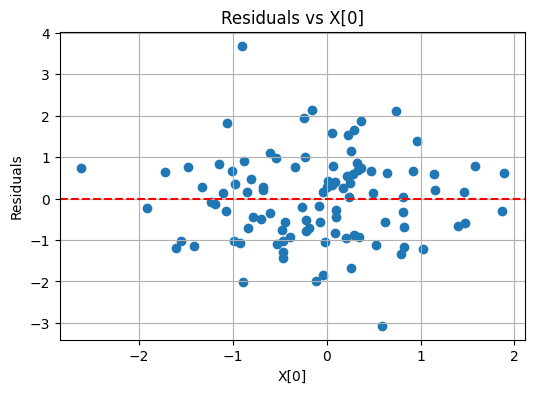

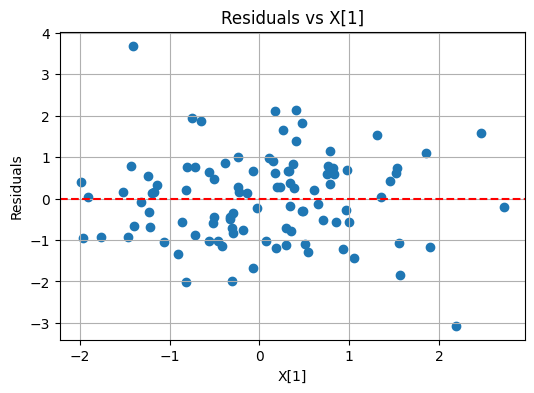

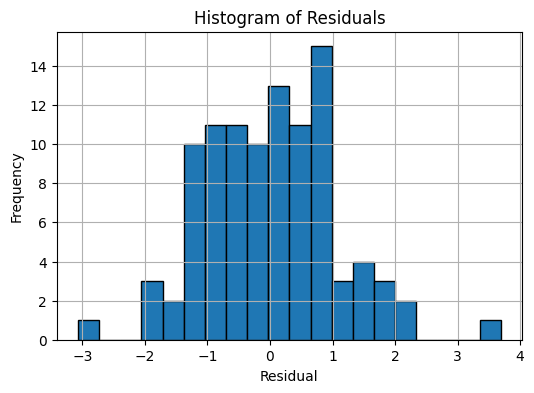

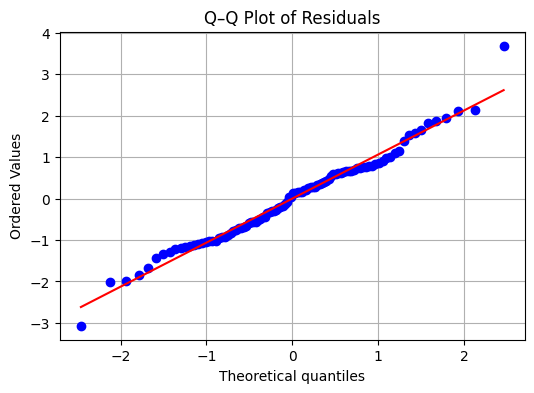

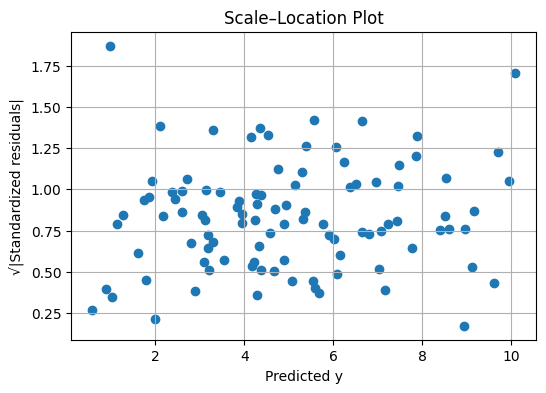

In [38]:
X, y, _ = generate_linear_regression_data(
    n=100, p=2, coefs=[1.5, 2], intercept=5.0, sigma=1.0, seed=42
)

beta_hat = fit_ols(X, y)
y_pred = predict(X, beta_hat)

plot_residuals(X, y, y_pred, plot_residuals_vs_features=True)


### Unbiased + Homoscedastic

In [39]:
from mlpeople.models.linear import (
    data_unbiased_homoscedastic,
    data_unbiased_heteroscedastic,
    data_biased_homoscedastic,
    data_biased_heteroscedastic
)

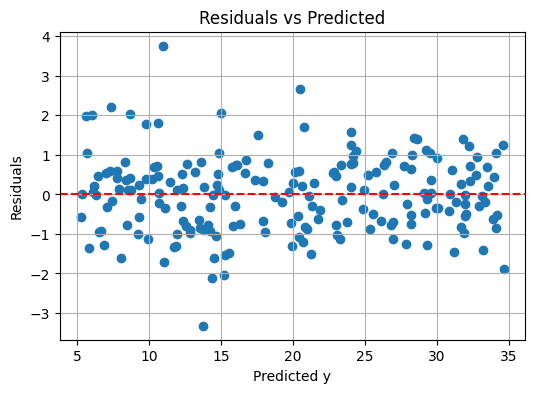

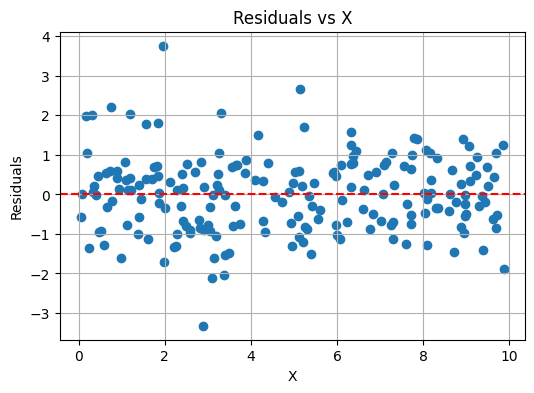

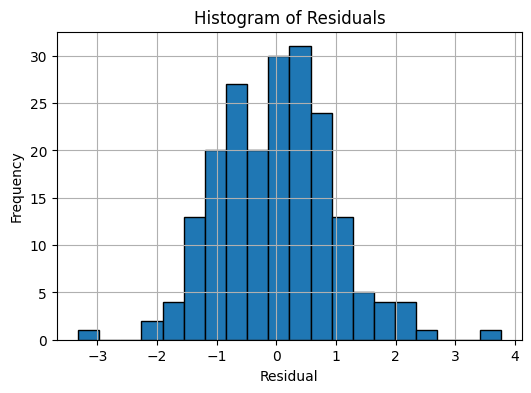

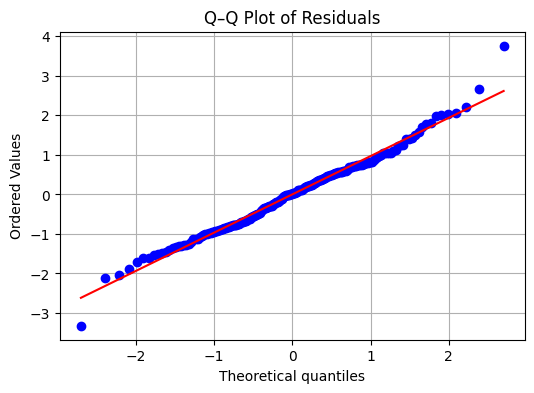

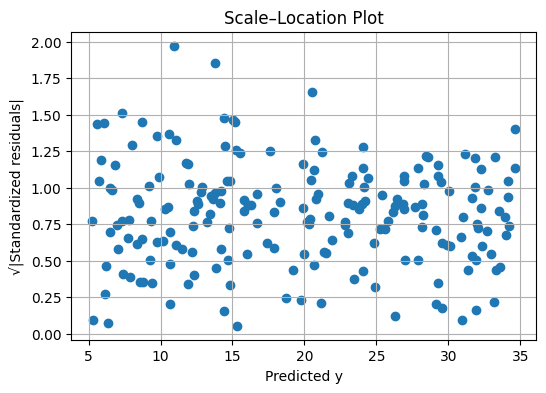

In [40]:
X, y = data_unbiased_homoscedastic()

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=["X"]
)


### Unbiased + Heteroscedastic

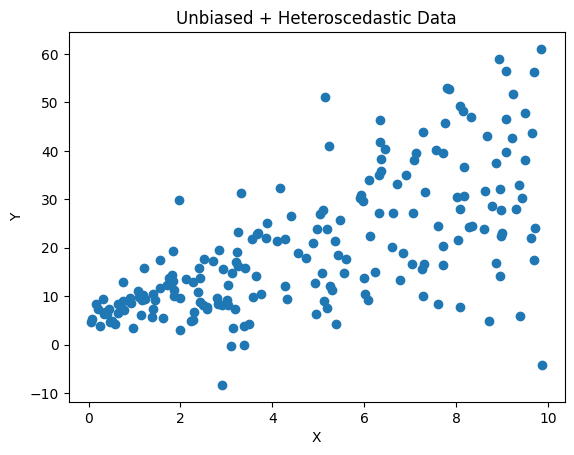

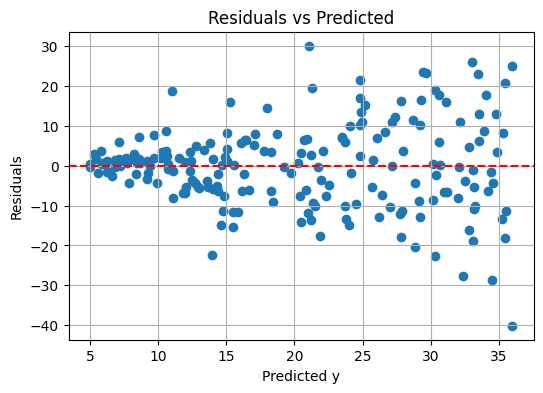

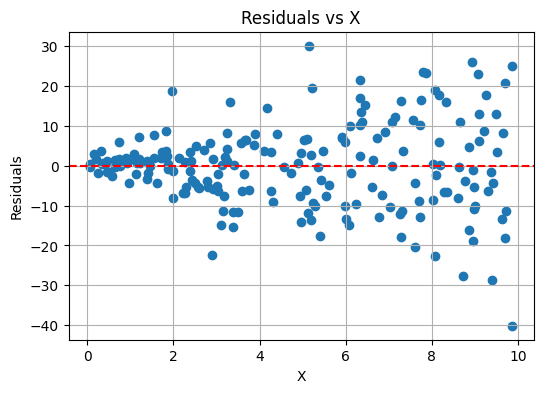

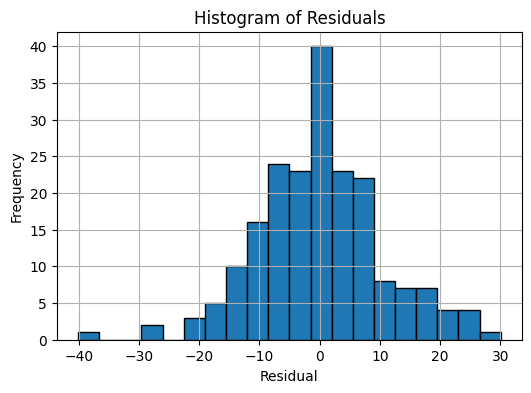

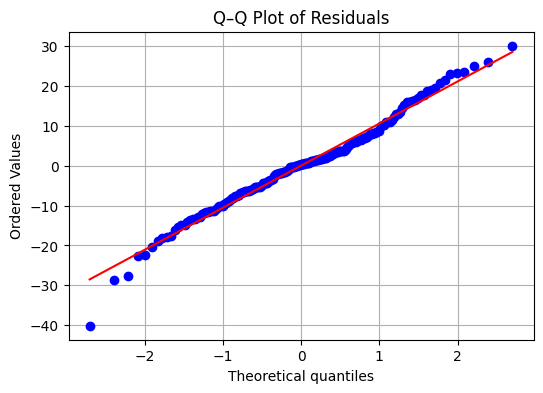

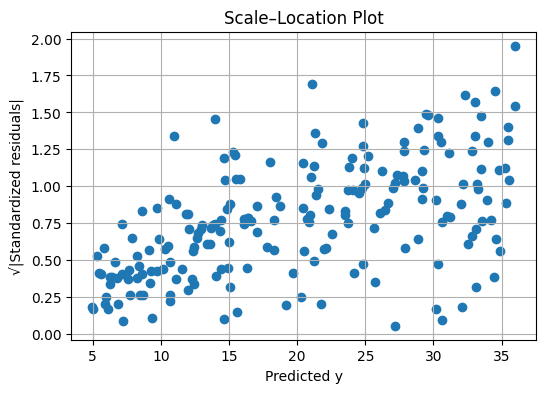

In [ ]:
from mlpeople.visualization.relationships.scatter import plot_scatter

X, y = data_unbiased_heteroscedastic(base_sigma=1, sigma_slope=2)

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_scatter(X.T[0], y, title='Unbiased + Heteroscedastic Data')

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=["X"]
)


### Biased + Homoscedastic

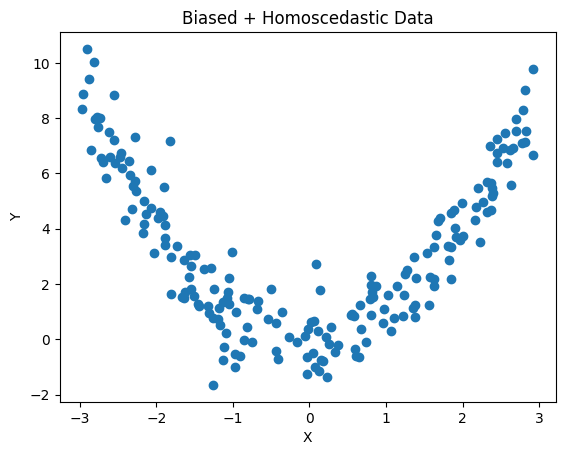

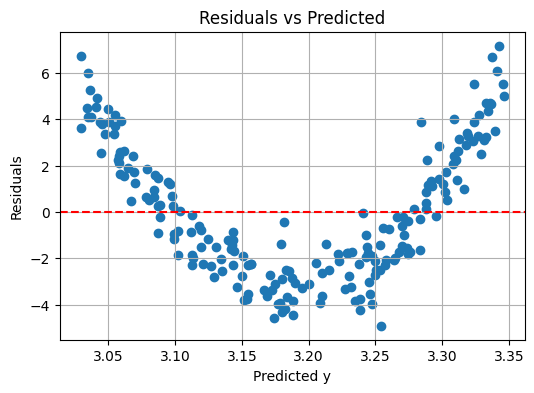

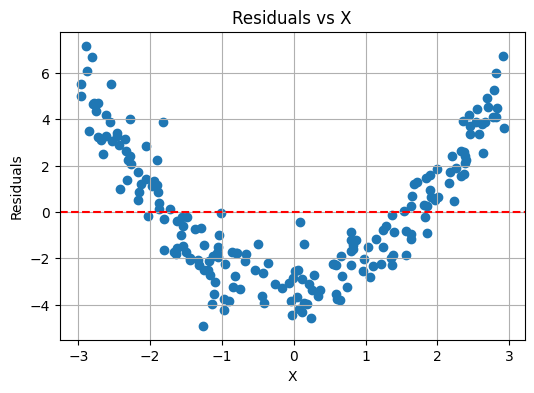

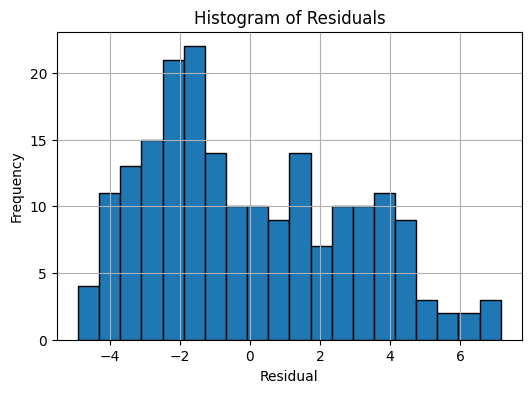

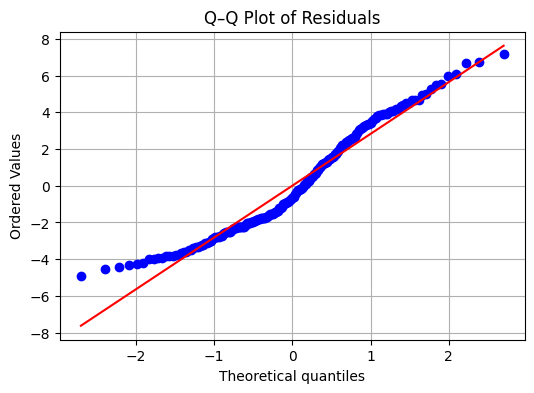

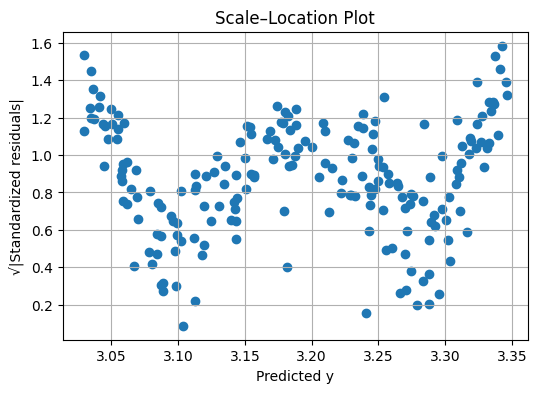

In [57]:
X, y = data_biased_homoscedastic(nonlinear_func=lambda x: x**2)

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_scatter(X.T[0], y, title='Biased + Homoscedastic Data')

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=["X"]
)

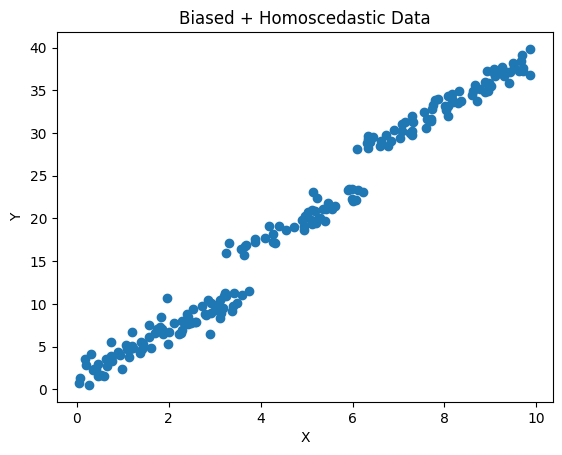

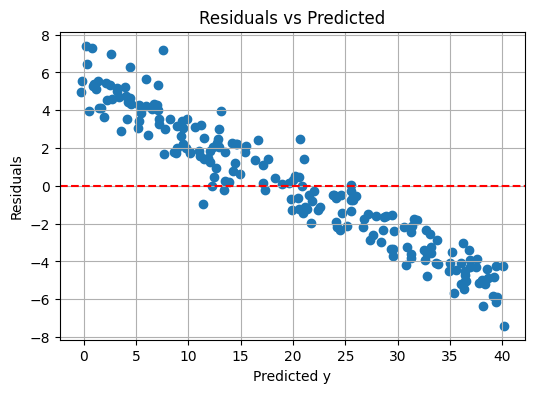

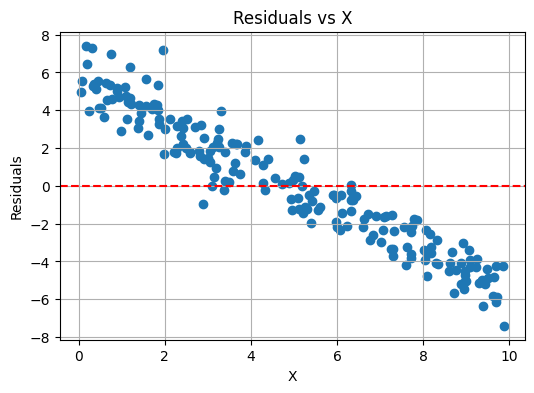

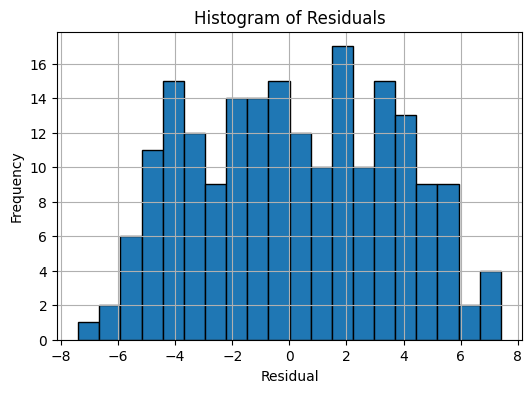

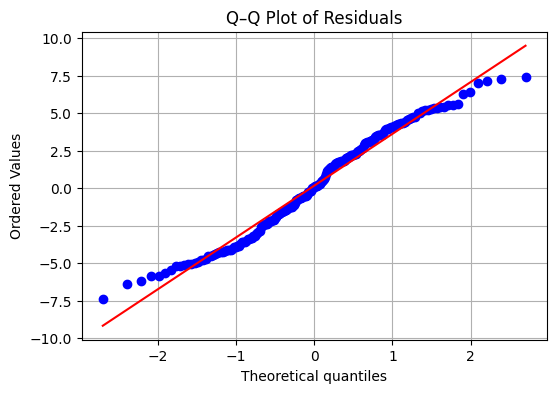

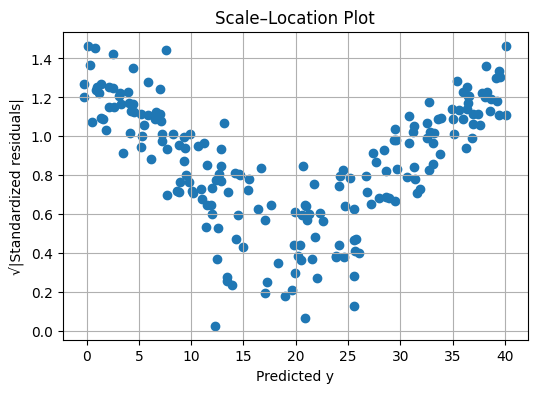

In [138]:
# get unbiased data and skew it
X, y = data_unbiased_homoscedastic()

def skew(yi):
    if yi -4 > np.mean(y):
        return  yi + 4
    elif yi + 4 < np.mean(y):
        return  yi - 4
    else:
        return yi

skewed_y = np.array(list(map(skew, y.tolist())))
    

beta_hat = fit_ols(X, skewed_y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_scatter(X.T[0], skewed_y, title='Biased + Homoscedastic Data')

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=["X"]
)

### Biased + Heteroscedastic

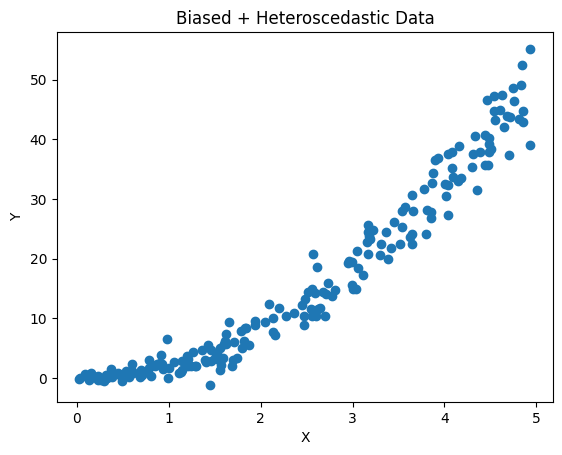

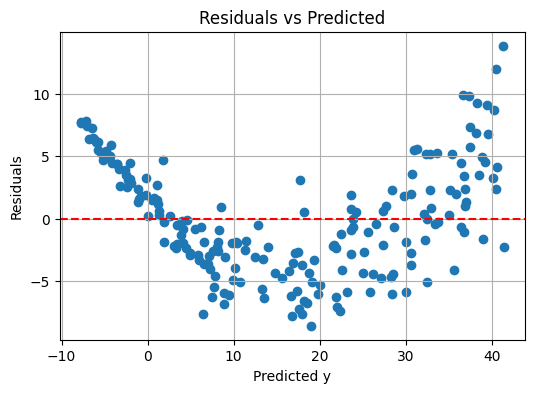

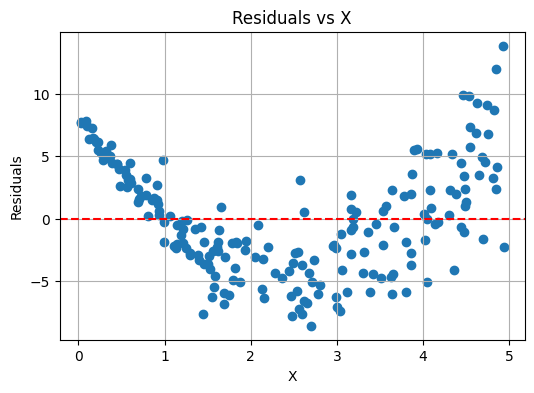

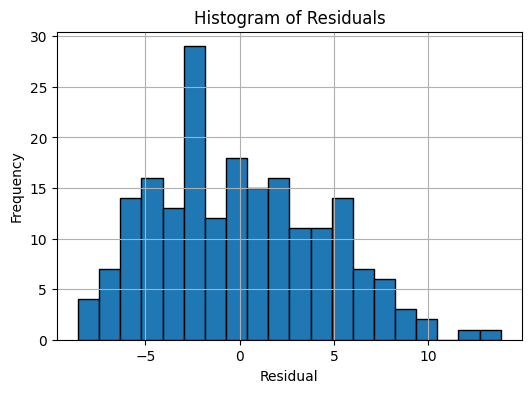

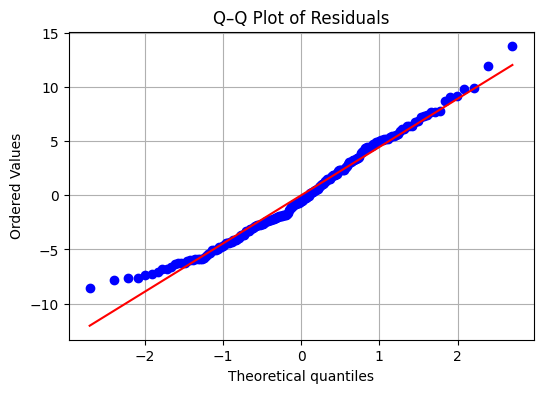

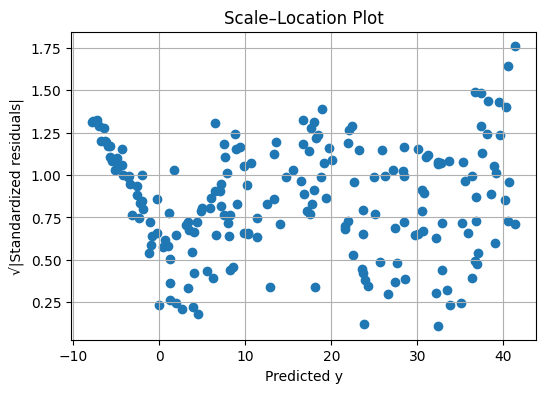

In [63]:
# X, y = data_biased_heteroscedastic(nonlinear_func=lambda x: x**2, base_sigma=1, sigma_slope=2)
X, y = data_biased_heteroscedastic(nonlinear_func=lambda x: 2*x**2, base_sigma=0.2, sigma_slope=1)


beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_scatter(X.T[0], y, title='Biased + Heteroscedastic Data')

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=["X"]
)

## T-test coefficients

In [ ]:
# import importlib

# import mlpeople.models.linear.data as mlpeople_models_linear_data
# importlib.reload(mlpeople_models_linear_data)

# import mlpeople.models.linear.visualization as mlpeople_models_linear_visualization
# importlib.reload(mlpeople_models_linear_visualization)

# import mlpeople.models.linear.metrics as mlpeople_models_linear_metrics
# importlib.reload(mlpeople_models_linear_metrics)

# import mlpeople.models.linear as mlpeople_models_linear
# importlib.reload(mlpeople_models_linear)

<module 'mlpeople.models.linear' from '/Users/maksymstefanko/ML/ML-love/data-loves-ml-for-people-course/src/mlpeople/models/linear/__init__.py'>

In [80]:
from mlpeople.models.linear import t_test_coefficients

In [81]:
# Generate data
X, y, beta_true = generate_linear_regression_data(
    n=100, p=5, coefs=[3.0, -1.5, 1.5, -2, 0.1], intercept=5.0, sigma=4, seed=42
)

# Fit OLS
beta_hat = fit_ols(X, y, fit_intercept=True)

# Compute t-test
t_stats, p_values = t_test_coefficients(X, y, beta_hat, fit_intercept=True)

for i, (t, p) in enumerate(zip(t_stats, p_values)):
    name = "Intercept" if i == 0 else f"X{i}"
    print(f"{name}: t = {t:.3f}, p = {p:.3f}")


Intercept: t = 11.729, p = 0.000
X1: t = 7.580, p = 0.000
X2: t = -2.479, p = 0.015
X3: t = 3.705, p = 0.000
X4: t = -3.484, p = 0.001
X5: t = 0.203, p = 0.839


X5: t = 0.203, p = 0.839 - is definitely candidate for removal from model

## Real Data - medical-charges.csv

In [ ]:
import pandas as pd

medical_df = pd.read_csv('data/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
medical_df_smoker = medical_df[medical_df['smoker'] == 'yes']
medical_df_none_smoker = medical_df[medical_df['smoker'] == 'no']

### Smoker - One Feature - age

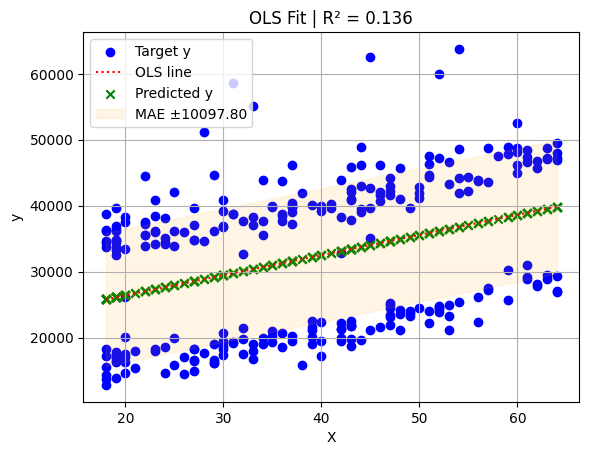

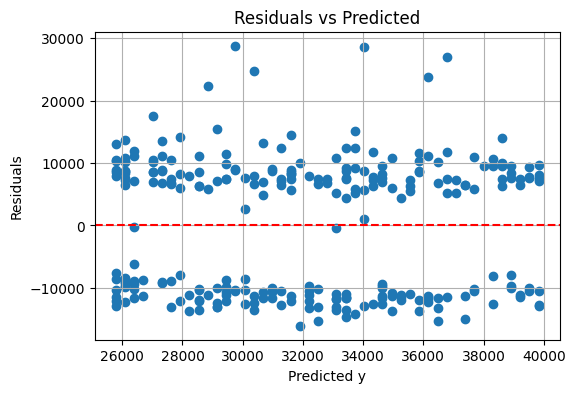

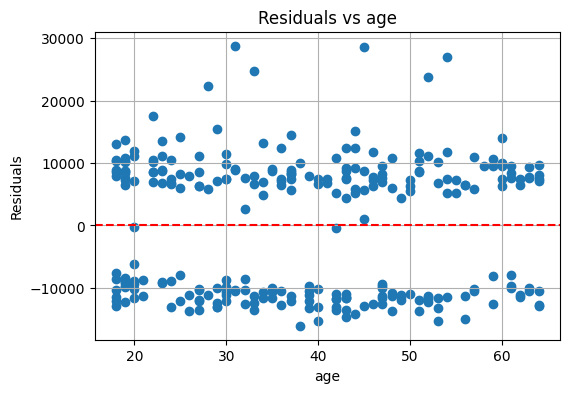

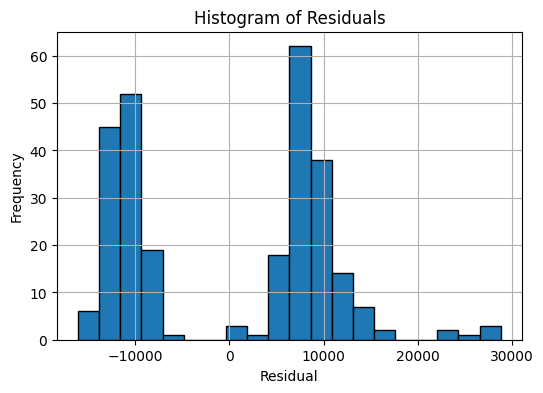

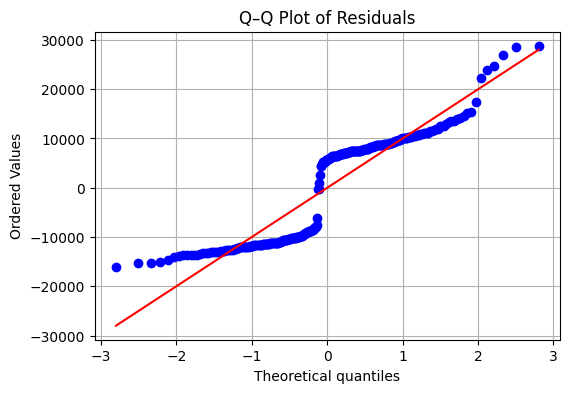

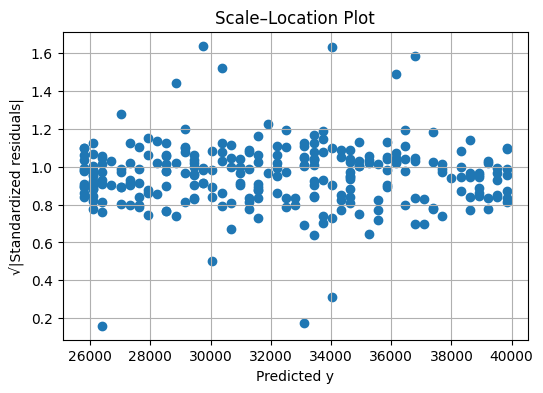

coefs: [20294.12812692   305.23760211]
R²: 0.13558924096084057
RMSE: 10711.00334810241
MAE: 10097.800577858732
RMSLE: 0.36499571970180034
Intercept: t = 10.606, p = 0.000
X1: t = 6.532, p = 0.000


In [122]:
y = medical_df_smoker['charges'].to_numpy()
X = medical_df_smoker[['age']].to_numpy()

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_ols_predictions_with_error(X, y, beta_hat, with_error="MAE", show_error_lines=False)

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=['age']
)

print("coefs:", beta_hat)
print("R²:", r2_score(y, y_pred))
print("RMSE:", rmse(y, y_pred))
print("MAE:", mae(y, y_pred))
print("RMSLE:", rmsle(y, y_pred))

t_stats, p_values = t_test_coefficients(X, y, beta_hat, fit_intercept=True)

for i, (t, p) in enumerate(zip(t_stats, p_values)):
    name = "Intercept" if i == 0 else f"X{i}"
    print(f"{name}: t = {t:.3f}, p = {p:.3f}")

### Smoker - One Feature - bmi

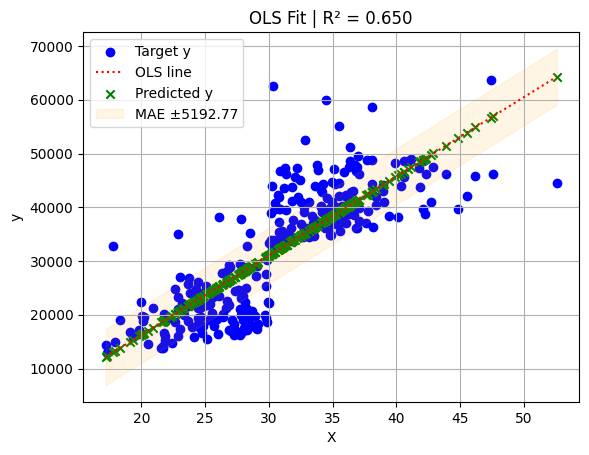

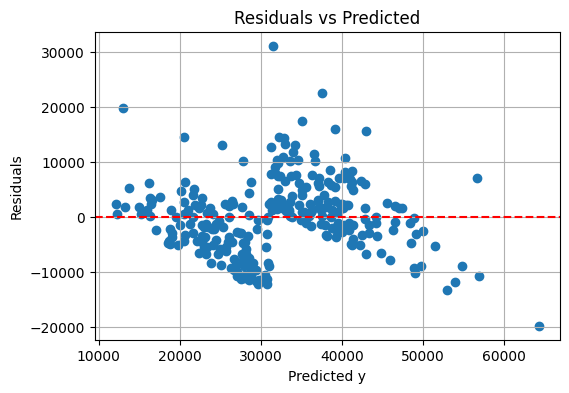

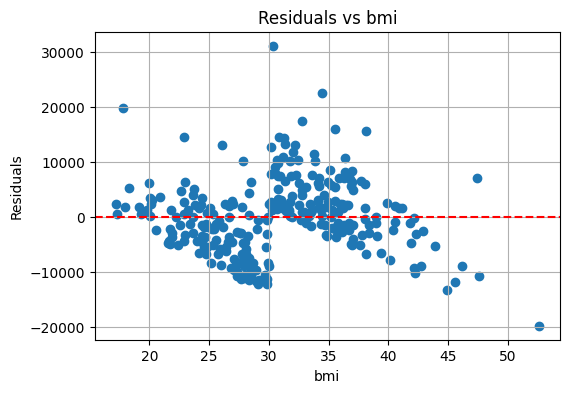

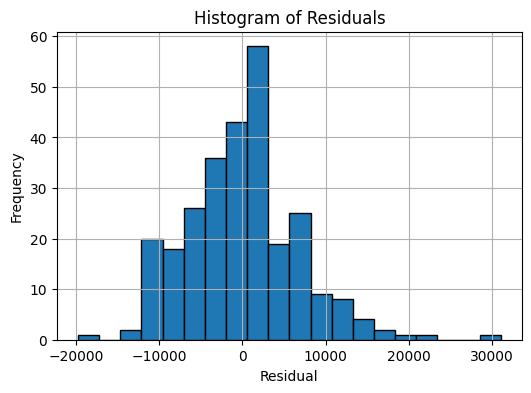

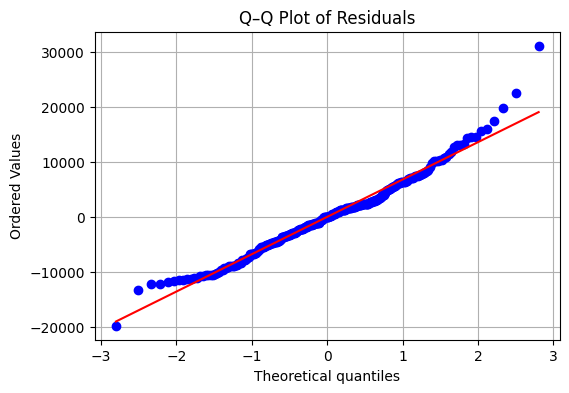

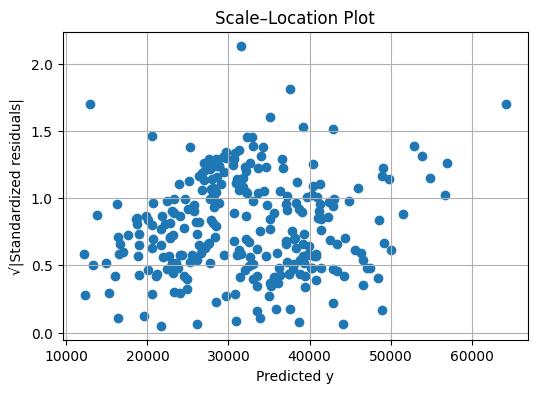

coefs: [-13186.57632276   1473.1062547 ]
R²: 0.6504109694921547
RMSE: 6811.59740830196
MAE: 5192.77070134545
RMSLE: 0.22826965234457083
Intercept: t = -6.423, p = 0.000
X1: t = 22.496, p = 0.000


In [123]:
y = medical_df_smoker['charges'].to_numpy()
X = medical_df_smoker[['bmi']].to_numpy()

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_ols_predictions_with_error(X, y, beta_hat, with_error="MAE", show_error_lines=False)

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=['bmi']
)

print("coefs:", beta_hat)
print("R²:", r2_score(y, y_pred))
print("RMSE:", rmse(y, y_pred))
print("MAE:", mae(y, y_pred))
print("RMSLE:", rmsle(y, y_pred))

t_stats, p_values = t_test_coefficients(X, y, beta_hat, fit_intercept=True)

for i, (t, p) in enumerate(zip(t_stats, p_values)):
    name = "Intercept" if i == 0 else f"X{i}"
    print(f"{name}: t = {t:.3f}, p = {p:.3f}")

### Smoker - Multiple Feature - age + bmi + children

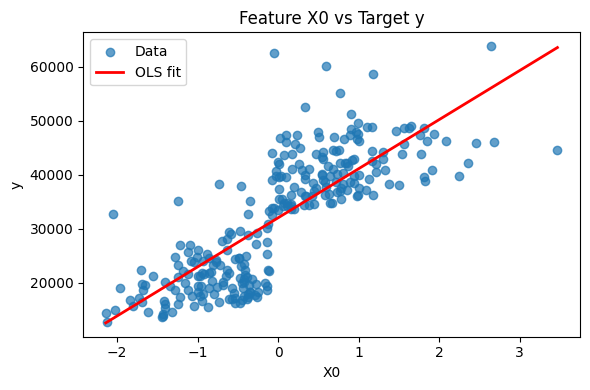

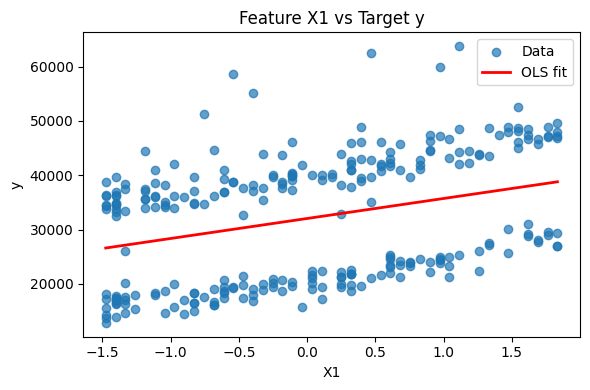

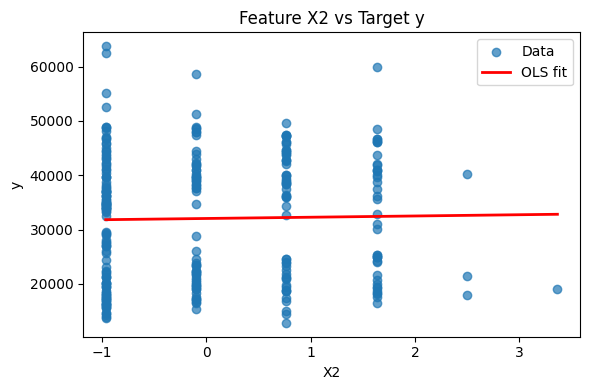

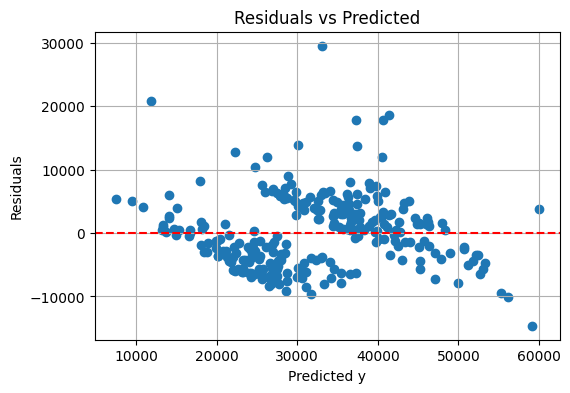

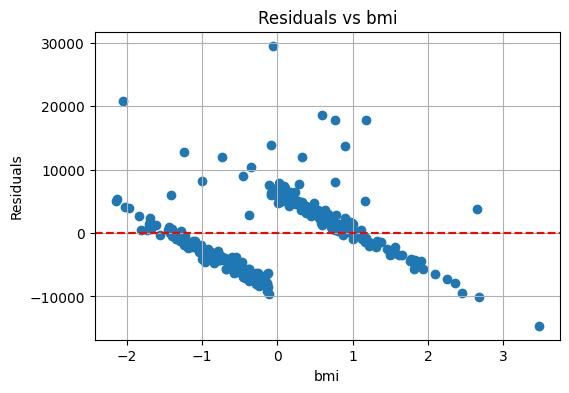

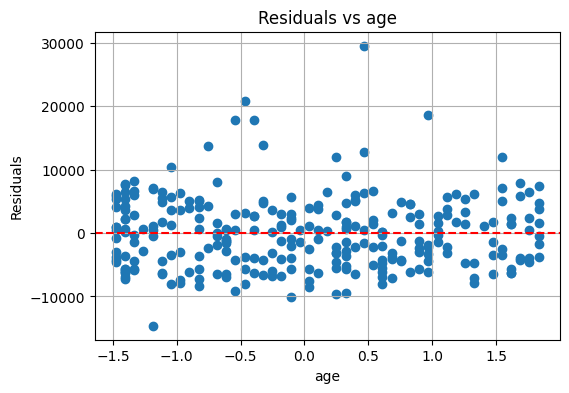

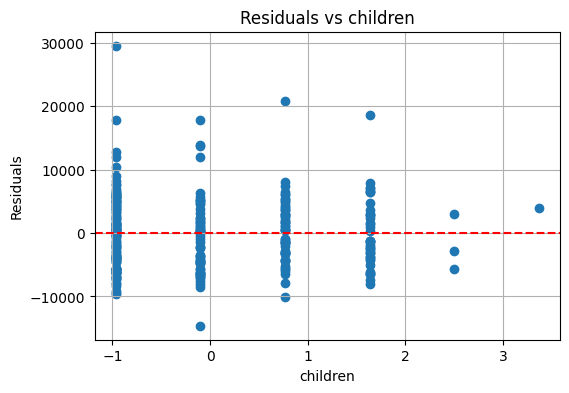

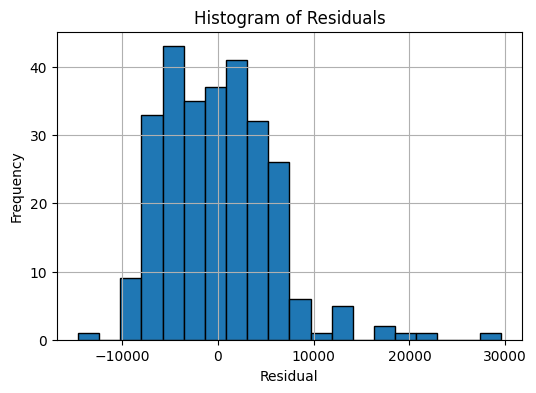

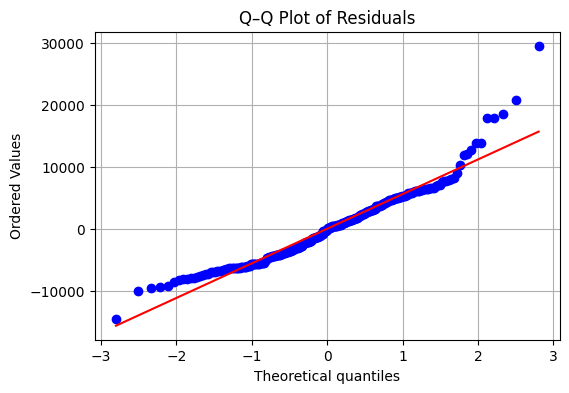

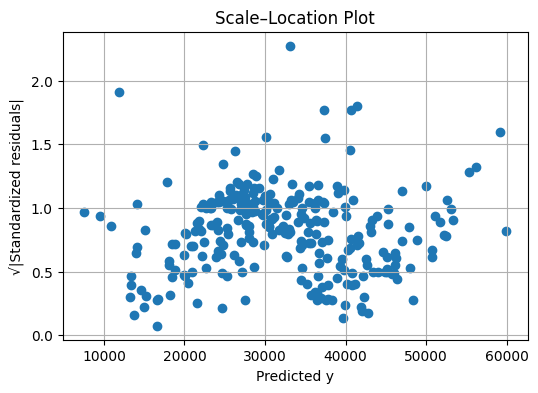

coefs: [32050.23183153  9074.21374918  3681.97630593   229.69724878]
R²: 0.7536350548830403
RMSE: 5718.202480524155
MAE: 4464.158747245065
RMSLE: 0.1950004658925601
Intercept: t = 92.099, p = 0.000
X1: t = 26.025, p = 0.000
X2: t = 10.526, p = 0.000
X3: t = 0.658, p = 0.511


In [124]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Target
y = medical_df_smoker['charges'].to_numpy()

# Features
X = medical_df_smoker[['bmi', 'age', 'children']].to_numpy()

# Scale X for better plots
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit OLS
beta_hat = fit_ols(X_scaled, y, fit_intercept=True)
y_pred = predict(X_scaled, beta_hat)

# Plot
plot_features_vs_target(X_scaled, y, beta_hat=beta_hat)

plot_residuals(
    X_scaled,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=['bmi', 'age', 'children']
)

# Metrics
print("coefs:", beta_hat)
print("R²:", r2_score(y, y_pred))
print("RMSE:", rmse(y, y_pred))
print("MAE:", mae(y, y_pred))
print("RMSLE:", rmsle(y, y_pred))

# t-test
t_stats, p_values = t_test_coefficients(X_scaled, y, beta_hat, fit_intercept=True)

for i, (t, p) in enumerate(zip(t_stats, p_values)):
    name = "Intercept" if i == 0 else f"X{i}"
    print(f"{name}: t = {t:.3f}, p = {p:.3f}")

children has no proven impact based on t-test

### Non Smoker - One Feature - age

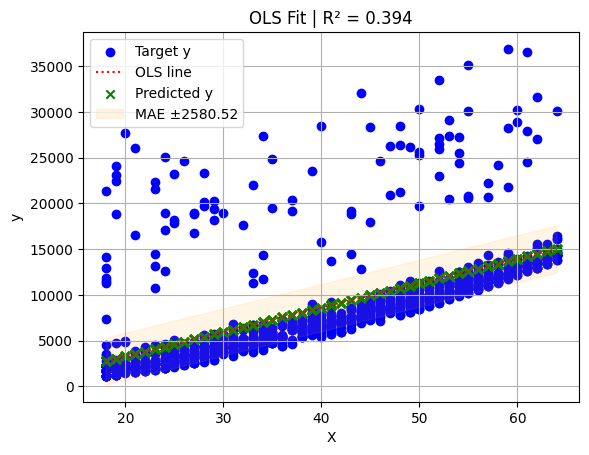

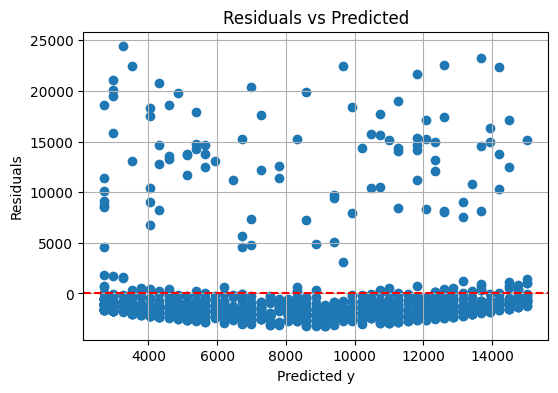

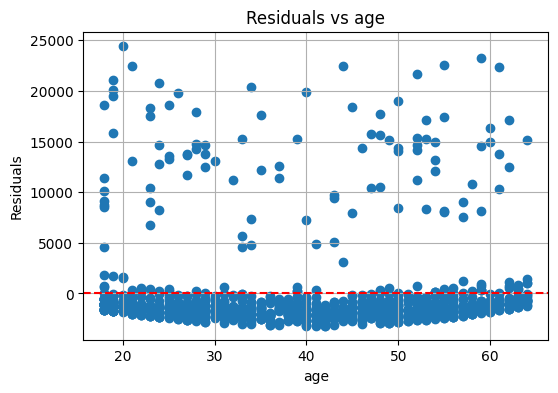

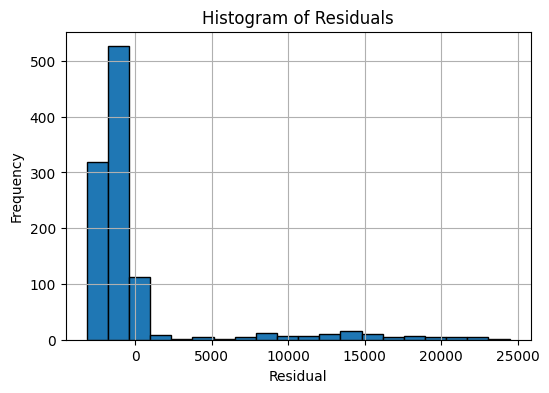

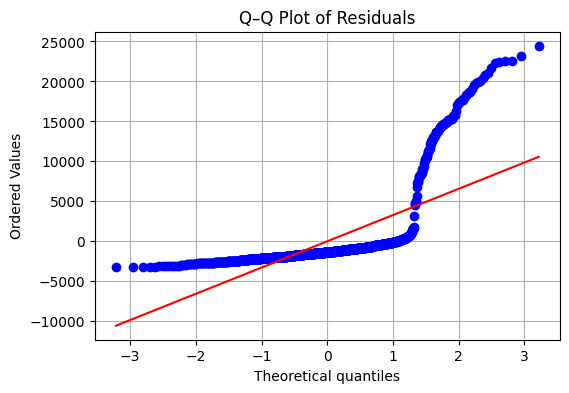

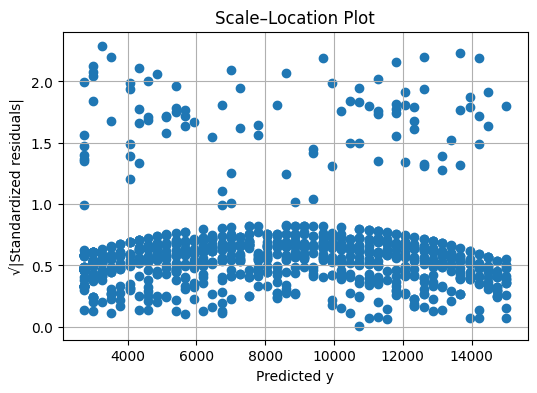

coefs: [-2091.42055657   267.24891283]
R²: 0.3943171632425906
RMSE: 4662.505766636395
MAE: 2580.5232282116103
RMSLE: 0.46686018143968805
Intercept: t = -4.920, p = 0.000
X1: t = 26.294, p = 0.000


In [125]:
y = medical_df_none_smoker['charges'].to_numpy()
X = medical_df_none_smoker[['age']].to_numpy()

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_ols_predictions_with_error(X, y, beta_hat, with_error="MAE", show_error_lines=False)

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=['age']
)

print("coefs:", beta_hat)
print("R²:", r2_score(y, y_pred))
print("RMSE:", rmse(y, y_pred))
print("MAE:", mae(y, y_pred))
print("RMSLE:", rmsle(y, y_pred))

t_stats, p_values = t_test_coefficients(X, y, beta_hat, fit_intercept=True)

for i, (t, p) in enumerate(zip(t_stats, p_values)):
    name = "Intercept" if i == 0 else f"X{i}"
    print(f"{name}: t = {t:.3f}, p = {p:.3f}")

### Non Smoker - One Feature - age - drop charage above 10k

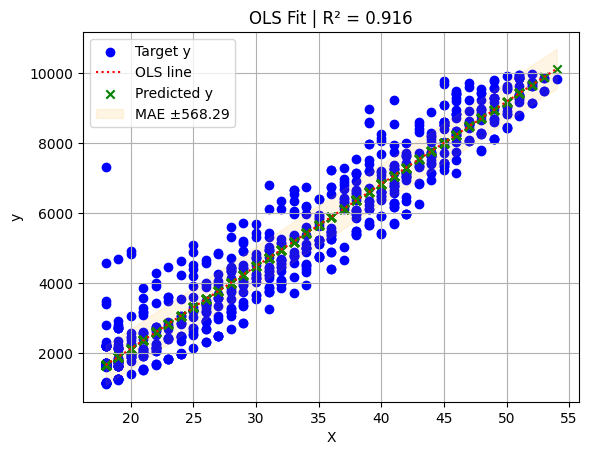

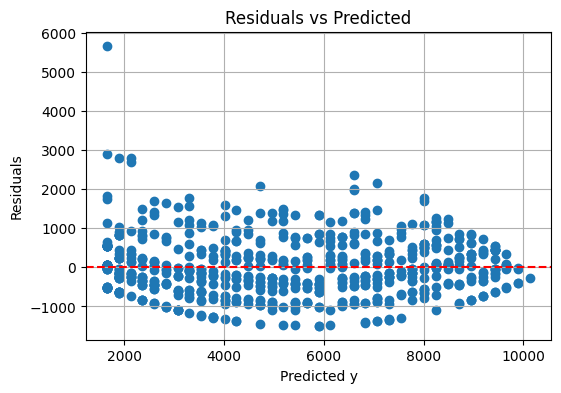

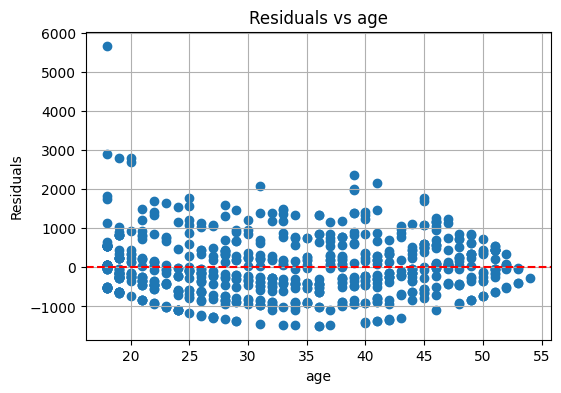

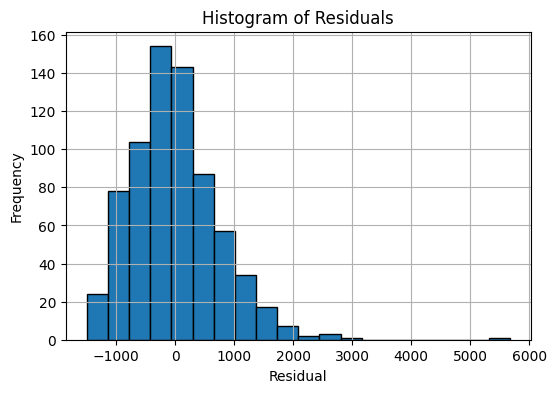

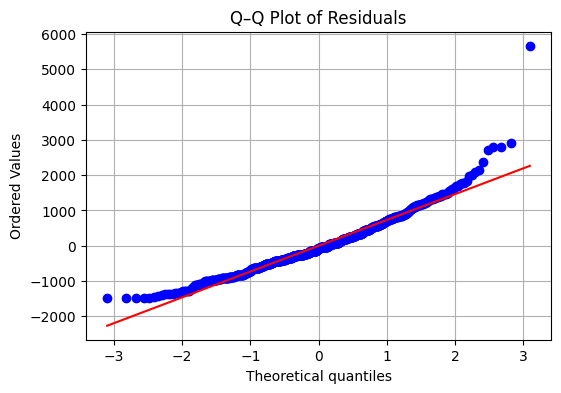

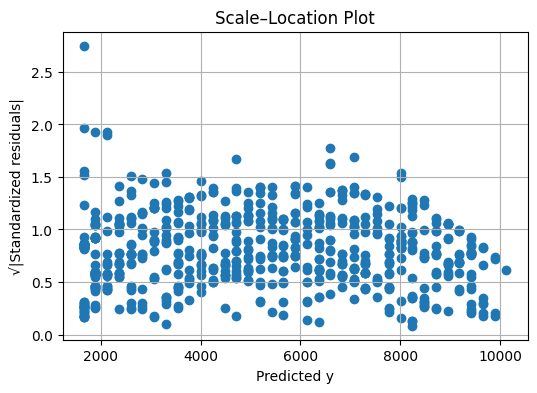

coefs: [-2582.19550987   235.39205508]
R²: 0.9158742780231769
RMSE: 749.7040091178613
MAE: 568.2915907652651
RMSLE: 0.2011199149301239
Intercept: t = -27.778, p = 0.000
X1: t = 87.919, p = 0.000


In [126]:
y = medical_df_none_smoker[medical_df_none_smoker['charges'] < 10000]['charges'].to_numpy()
X = medical_df_none_smoker[medical_df_none_smoker['charges'] < 10000][['age']].to_numpy()

beta_hat = fit_ols(X, y, fit_intercept=True)
y_pred = predict(X, beta_hat)

plot_ols_predictions_with_error(X, y, beta_hat, with_error="MAE", show_error_lines=False)

plot_residuals(
    X,
    y,
    y_pred,
    plot_residuals_vs_features=True,
    feature_names=['age']
)

print("coefs:", beta_hat)
print("R²:", r2_score(y, y_pred))
print("RMSE:", rmse(y, y_pred))
print("MAE:", mae(y, y_pred))
print("RMSLE:", rmsle(y, y_pred))

t_stats, p_values = t_test_coefficients(X, y, beta_hat, fit_intercept=True)

for i, (t, p) in enumerate(zip(t_stats, p_values)):
    name = "Intercept" if i == 0 else f"X{i}"
    print(f"{name}: t = {t:.3f}, p = {p:.3f}")